# Part I - Prosper Loan Data Exploration
## by Yazan Shaheen

## Introduction

> Prosper is a peer-to-peer lending website that brings borrowers and investors together. The data set has loan information from Prosper, such as loan amount, borrower rate (interest rate), current status of the loan, borrower income, and numerous other features. This analysis will be centered on identifying the variables that influence loan outcomes and interest rates on the Prosper website.

> The dataset contains 113,937 loans with 81 variables per loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many other features.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display format to avoid scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_style('whitegrid')

# Define order for categorical variables
LoanStatus_order = [
    'Current', 'Completed', 'Chargedoff', 'Defaulted',
    'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
    'FinalPaymentInProgress', 'Cancelled'
]

ProsperRating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [2]:
# Load the Prosper Loan dataset
df = pd.read_csv('prosperLoanData.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
display(df.head())

# Check data types and missing values
print(f"\nData types and non-null counts:")
display(df.info())

# Statistical summary
print(f"\nSummary statistics:")
display(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)
display(missing_data.head(10))  # Display top 10 columns with missing values

# Show unique values for some categorical columns
categorical_columns = ['LoanStatus', 'BorrowerState', 'EmploymentStatus', 'ListingCategory (numeric)', 'ProsperRating (Alpha)']
for col in categorical_columns:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts().head())

Dataset shape: (113937, 81)

First 5 rows:


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.1652,0.1580,0.1380,...,-133.1800,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.1202,0.0920,0.0820,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.2827,0.2750,0.2400,...,-24.2000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.1253,0.0974,0.0874,...,-108.0100,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.2461,0.2085,0.1985,...,-60.2700,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,20



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-

None


Summary statistics:


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.0000,113937.0000,113912.0000,113937.0000,113937.0000,84853.0000,84853.0000,84853.0000,84853.0000,84853.0000,...,113937.0000,113937.0000,113937.0000,113937.0000,113937.0000,113937.0000,113937.0000,113937.0000,113937.0000,113937.0000
mean,627885.6925,40.8302,0.2188,0.1928,0.1827,0.1687,0.0803,0.0961,4.0722,5.9501,...,-54.7256,-14.2427,700.4463,681.4205,25.1427,0.9986,0.0480,0.0235,16.5508,80.4752
std,328076.2364,10.4362,0.0804,0.0748,0.0745,0.0685,0.0468,0.0304,1.6732,2.3765,...,60.6754,109.2328,2388.5138,2357.1671,275.6579,0.0179,0.3324,0.2324,294.5454,103.2390
min,4.0000,12.0000,0.0065,0.0000,-0.0100,-0.1827,0.0049,-0.1827,1.0000,1.0000,...,-664.8700,-9274.7500,-94.2000,-954.5500,0.0000,0.7000,0.0000,0.0000,0.0000,1.0000
25%,400919.0000,36.0000,0.1563,0.1340,0.1242,0.1157,0.0424,0.0741,3.0000,4.0000,...,-73.1800,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000
50%,600554.0000,36.0000,0.2098,0.1840,0.1730,0.1615,0.0724,0.0917,4.0000,6.0000,...,-34.4400,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,44.0000
75%,892634.0000,36.0000,0.2838,0.2500,0.2400,0.2243,0.1120,0.1166,5.0000,8.0000,...,-13.9200,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,115.0000
max,1255725.0000,60.0000,0.5123,0.4975,0.4925,0.3199,0.3660,0.2837,7.0000,11.0000,...,32.0600,0.0000,25000.0000,25000.0000,21117.9000,1.0125,39.0000,33.0000,25000.0000,1189.0000


,Missing Values,Percentage
GroupKey,100596,88.2909
LoanFirstDefaultedCycleNumber,96985,85.1216
ScorexChangeAtTimeOfListing,95009,83.3873
OnTimeProsperPayments,91852,80.6165
TotalProsperPaymentsBilled,91852,80.6165
TotalProsperLoans,91852,80.6165
ProsperPrincipalOutstanding,91852,80.6165
ProsperPaymentsLessThanOneMonthLate,91852,80.6165
ProsperPaymentsOneMonthPlusLate,91852,80.6165
ProsperPrincipalBorrowed,91852,80.6165



Unique values in LoanStatus:
LoanStatus
Current                 56576
Completed               38074
Chargedoff              11992
Defaulted                5018
Past Due (1-15 days)      806
Name: count, dtype: int64

Unique values in BorrowerState:
BorrowerState
CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
Name: count, dtype: int64

Unique values in EmploymentStatus:
EmploymentStatus
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Name: count, dtype: int64

Unique values in ListingCategory (numeric):
ListingCategory (numeric)
1    58308
0    16965
7    10494
2     7433
3     7189
Name: count, dtype: int64

Unique values in ProsperRating (Alpha):
ProsperRating (Alpha)
C    18345
B    15581
A    14551
D    14274
E     9795
Name: count, dtype: int64


### What is the structure of your dataset?

> Prosper Loan dataset consists of 113,937 loans and 81 variables. The dataset includes numerical features (like loan amount, borrower rate, monthly income) and categorical features (like loan status, borrower state, employment status). There is some missing data in a few of the columns which will need to be handled while analyzing.


### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are:
> 1. BorrowerRate (the interest rate of the loan)
> 2. LoanStatus (current status of the loan)
> 3. LoanOriginalAmount (the original amount of the loan)
> 4. ProsperRating (the rating assigned to the loan by Prosper)

> I'm particularly interested in understanding what factors influence the interest rate borrowers receive and what leads to successful loan repayments.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Several features will likely help support this investigation:
> 1. StatedMonthlyIncome (borrower's stated monthly income)
> 2. EmploymentStatus (borrower's employment status)
> 3. DebtToIncomeRatio (ratio of debt to income)
> 4. CreditScoreRangeLower and CreditScoreRangeUpper (borrower's credit score)
> 5. Term (the length of the loan in months)
> 6. ListingCategory (the purpose of the loan)
> 7. ProsperScore (custom risk score developed by Prosper)

## Univariate Exploration

In [3]:
# Set display format to avoid scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_style('whitegrid')

def plot_numeric_distribution(data, column, bins=30, figsize=(12, 5)):

    plt.figure(figsize=figsize)

    # Create a subplot with 1 row and 2 columns
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column, kde=True, bins=bins)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Add boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, column, figsize=(12, 6), max_categories=15, order=None):
    plt.figure(figsize=figsize)

    # If order is specified, use it; otherwise use value_counts
    if order is not None:
        # Filter to only include categories that exist in the data
        valid_order = [cat for cat in order if cat in data[column].unique()]

        # Calculate counts for ordered categories
        counts = data[column].value_counts()
        ordered_counts = pd.Series([counts.get(cat, 0) for cat in valid_order], index=valid_order)

        sns.barplot(x=ordered_counts.index, y=ordered_counts.values)
    else:
        # Original logic
        value_counts = data[column].value_counts()

        # If there are too many categories, show only the top ones
        if len(value_counts) > max_categories:
            other_count = value_counts[max_categories:].sum()
            value_counts = value_counts[:max_categories]
            value_counts['Other'] = other_count

        sns.barplot(x=value_counts.index, y=value_counts.values)

    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Question: What is the distribution of interest rates (BorrowerRate) on Prosper loans?


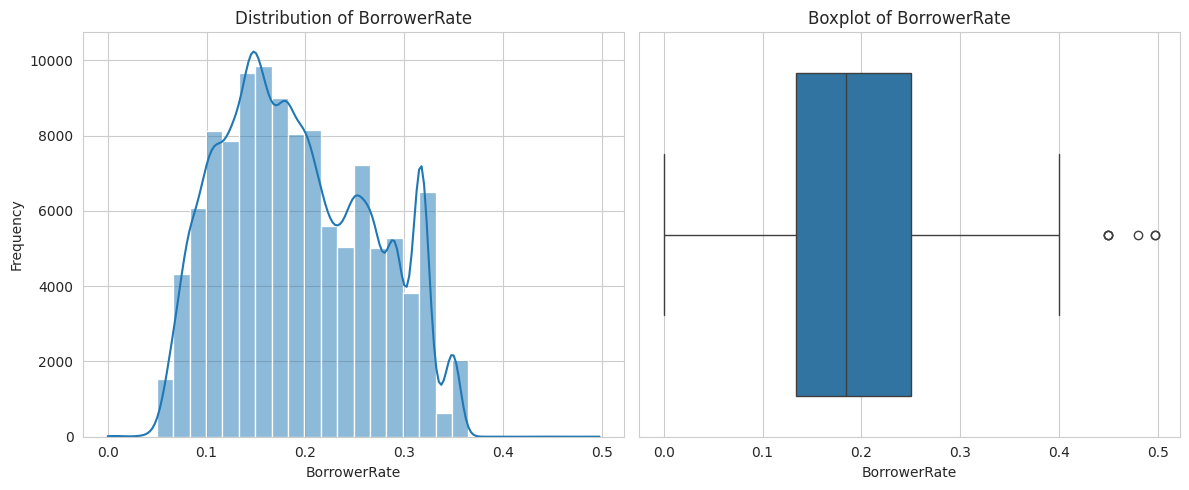

Observations: The distribution of interest rates appears somewhat normal but with a very slight positive skew. Most loans fall in the range 0.10 (10%) - 0.35 (35%), with most of them falling in the 0.15-0.20 (15-20%) range. There are outliers at the higher end.

Question: How are loan amounts distributed on the Prosper platform?


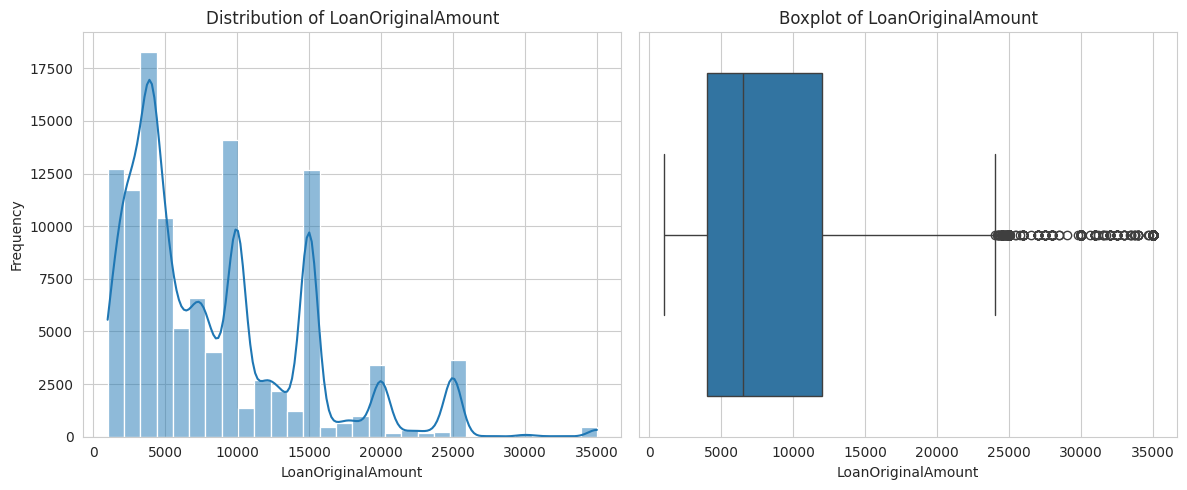

Observations: The size of loans shows a multi-modal distribution with large peaks at well-known round figures (presumably $5,000, $10,000, $15,000, etc.). The distribution is right-skewed with most loans below $20,000. The boxplot shows that there are numerous outliers on the right.

Question: What is the distribution of borrowers' stated monthly income?


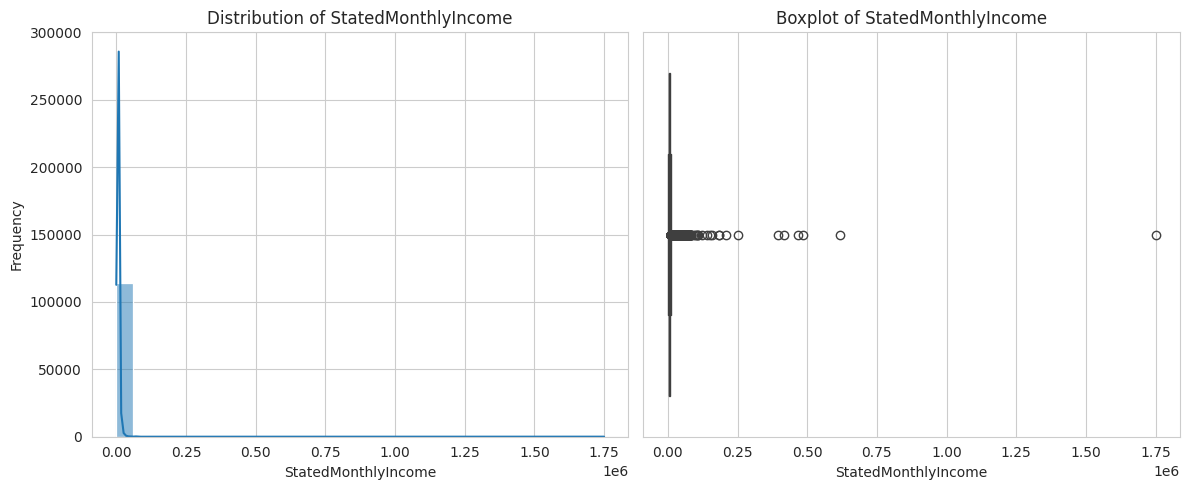

Observations: The monthly income distribution is very right-skewed with a very long tail. Most borrowers have incomes less than $10,000, and the majority of them have incomes less than $5,000. There are very large outliers that might need to be treated in future analysis.

Question: How are loan terms distributed?


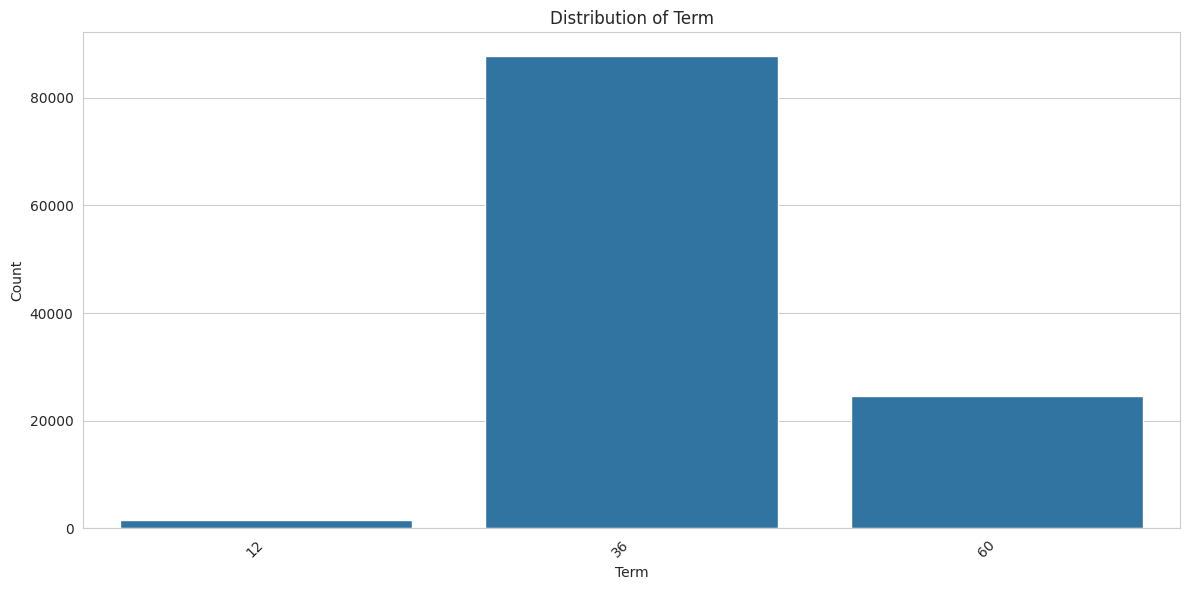

Observations: Prosper loans are offered with specific terms. The most common term appears to be 36 months, then 60 months. There are relatively fewer shorter-term loans.

Question: How are Prosper's loan ratings distributed?


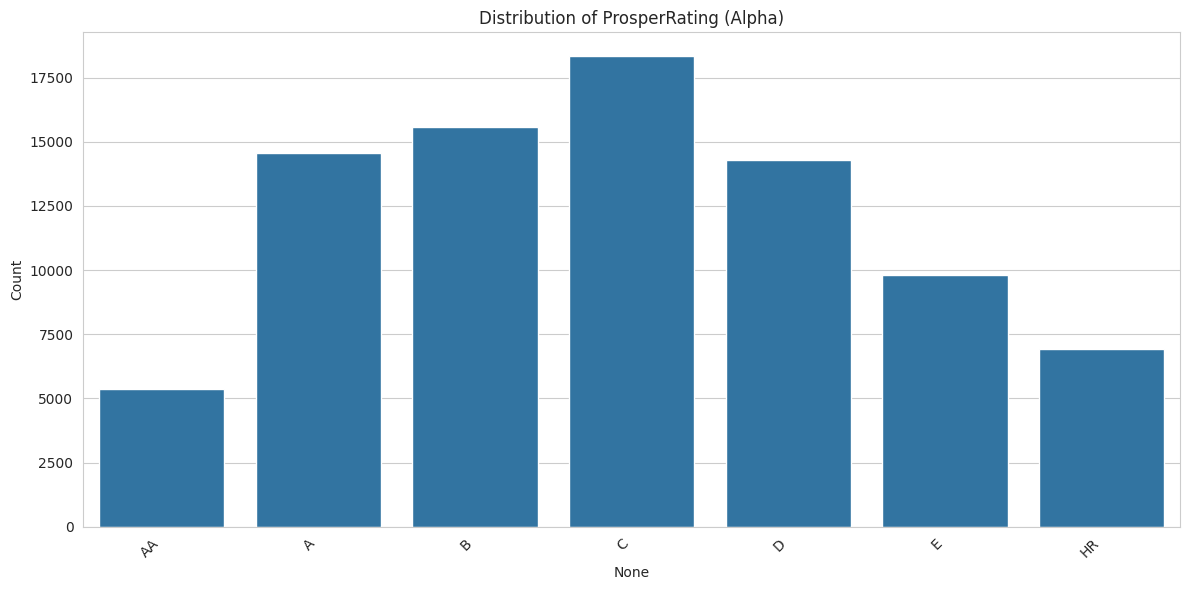

Observations: The distribution of Prosper ratings suggests that most loans fall in the middle rating ranges. There are fewer with the highest (AA, A) and lowest (HR) ratings. This suggests a bell curve in the risk measurement of borrowers.

Question: What is the distribution of loan statuses?


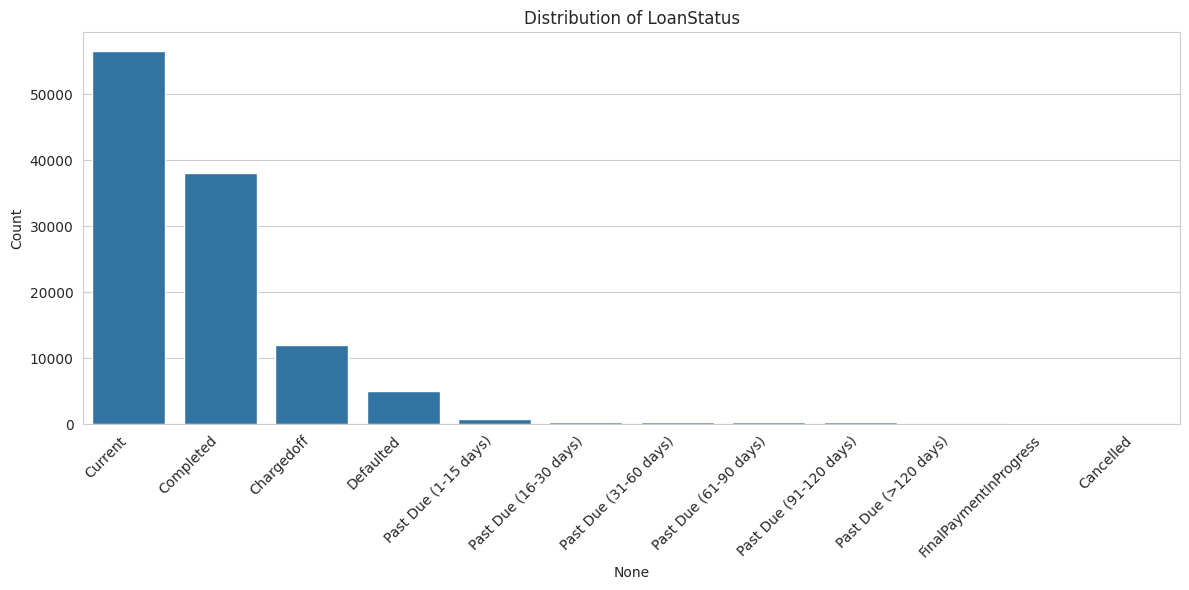

Observations: Most of the loans are either 'Current' (in process of being repaid) or 'Completed' (fully paid). There are lesser numbers of loans in certain delinquent or defaulted states. This is a sign of the overall health of the loan portfolio.


In [4]:
# Explore BorrowerRate (interest rate)
print("Question: What is the distribution of interest rates (BorrowerRate) on Prosper loans?")
plot_numeric_distribution(df, 'BorrowerRate')
print("Observations: The distribution of interest rates appears somewhat normal but with a very slight positive skew. Most loans fall in the range 0.10 (10%) - 0.35 (35%), with most of them falling in the 0.15-0.20 (15-20%) range. There are outliers at the higher end.")

# Explore LoanOriginalAmount
print("\nQuestion: How are loan amounts distributed on the Prosper platform?")
plot_numeric_distribution(df, 'LoanOriginalAmount')
print("Observations: The size of loans shows a multi-modal distribution with large peaks at well-known round figures (presumably $5,000, $10,000, $15,000, etc.). The distribution is right-skewed with most loans below $20,000. The boxplot shows that there are numerous outliers on the right.")

# Explore StatedMonthlyIncome
print("\nQuestion: What is the distribution of borrowers' stated monthly income?")
plot_numeric_distribution(df, 'StatedMonthlyIncome')
print("Observations: The monthly income distribution is very right-skewed with a very long tail. Most borrowers have incomes less than $10,000, and the majority of them have incomes less than $5,000. There are very large outliers that might need to be treated in future analysis.")

# Explore Term (loan duration)
print("\nQuestion: How are loan terms distributed?")
plot_categorical_distribution(df, 'Term')
print("Observations: Prosper loans are offered with specific terms. The most common term appears to be 36 months, then 60 months. There are relatively fewer shorter-term loans.")

# Explore ProsperRating
print("\nQuestion: How are Prosper's loan ratings distributed?")
plot_categorical_distribution(df, 'ProsperRating (Alpha)', order=ProsperRating_order)
print("Observations: The distribution of Prosper ratings suggests that most loans fall in the middle rating ranges. There are fewer with the highest (AA, A) and lowest (HR) ratings. This suggests a bell curve in the risk measurement of borrowers.")

# Explore LoanStatus
print("\nQuestion: What is the distribution of loan statuses?")
plot_categorical_distribution(df, 'LoanStatus', order=LoanStatus_order)
print("Observations: Most of the loans are either 'Current' (in process of being repaid) or 'Completed' (fully paid). There are lesser numbers of loans in certain delinquent or defaulted states. This is a sign of the overall health of the loan portfolio.")

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Based on the univariate exploration, I've observed several interesting patterns:
> 1. BorrowerRate (Interest Rate): The distribution is somewhat normal but with a slight positive skew. Most loans have interest rates between 10% and 35%, with the majority around 15-20%.
> 2. LoanOriginalAmount: The loan amounts show a multi-modal distribution with clear peaks at common round numbers (likely <span>5,000,</span>10,000, $15,000, etc.). This makes sense as borrowers tend to request loans in round numbers.
> 3. StatedMonthlyIncome: This variable has a heavily right-skewed distribution with extreme outliers. Some reported monthly incomes are unrealistically high, possibly due to data entry errors or misreporting. For further analysis, I may need to cap or log-transform this variable.
> 4. Term: Loans on Prosper are offered with specific terms, with 36 months being the most common, followed by 60 months.
> 5. ProsperRating: The distribution of ratings follows roughly a normal distribution, with more loans in the middle categories and fewer at the extremes.
> 6. LoanStatus: Most loans are either current or completed, which suggests a generally healthy loan portfolio.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The most asymmetric distribution was in the StatedMonthlyIncome variable, with extreme outliers. Some of the reported incomes are incredibly high and unrealistic, which would skew any analysis.
> For any deeper analysis, I would consider:
> 1. Log-transforming the income variable to reduce the effect of outliers
> 2. Capping the income at a reasonable upper limit (e.g., 99th percentile)
> 3. Creating income brackets to analyze as a categorical variable

> I also noted that some categorical variables like LoanStatus have many categories. For more focused analysis, these could be aggregated into broader categories (e.g., "Good standing" vs "Problematic"). I have not made any transformations as yet at this stage, but I will bear these in mind while proceeding with bivariate and multivariate analysis.

## Bivariate Exploration


In [5]:
def plot_numeric_bivariate(data, x_col, y_col, figsize=(12, 6), sample=None):

    # Sample data if specified (useful for large datasets)
    if sample is not None and sample < len(data):
        data_sample = data.sample(sample, random_state=42)
    else:
        data_sample = data

    plt.figure(figsize=figsize)
    sns.scatterplot(data=data_sample, x=x_col, y=y_col, alpha=0.5)
    plt.title(f'Relationship between {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

def plot_categorical_bivariate(data, cat_col, num_col, figsize=(12, 6), max_categories=10, order=None):
    plt.figure(figsize=figsize)

    # Create a copy of the data and convert to categorical with specified order if provided
    data_plot = data.copy()
    if order is not None:
        # Only use categories that exist in the data
        valid_order = [cat for cat in order if cat in data_plot[cat_col].unique()]
        data_plot[cat_col] = pd.Categorical(data_plot[cat_col], categories=valid_order, ordered=True)

    # Check if there are too many categories and no order is specified
    if data_plot[cat_col].nunique() > max_categories and order is None:
        top_cats = data_plot[cat_col].value_counts().nlargest(max_categories).index
        data_plot = data_plot[data_plot[cat_col].isin(top_cats)]
        plt.title(f'{num_col} by {cat_col} (Top {max_categories} categories)')
    else:
        plt.title(f'{num_col} by {cat_col}')

    # Create the boxplot
    sns.boxplot(data=data_plot, x=cat_col, y=num_col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_heatmap(data, col1, col2, figsize=(12, 8), order1=None, order2=None):
    # Create a copy and convert to categorical with specified orders if provided
    data_plot = data.copy()
    if order1 is not None:
        valid_order1 = [cat for cat in order1 if cat in data_plot[col1].unique()]
        data_plot[col1] = pd.Categorical(data_plot[col1], categories=valid_order1, ordered=True)
    if order2 is not None:
        valid_order2 = [cat for cat in order2 if cat in data_plot[col2].unique()]
        data_plot[col2] = pd.Categorical(data_plot[col2], categories=valid_order2, ordered=True)

    # Create the crosstab
    crosstab = pd.crosstab(data_plot[col1], data_plot[col2], normalize='columns')

    plt.figure(figsize=figsize)
    sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Relationship between {col1} and {col2}')
    plt.tight_layout()
    plt.show()

Question: How does the borrower's Prosper rating affect their interest rate?


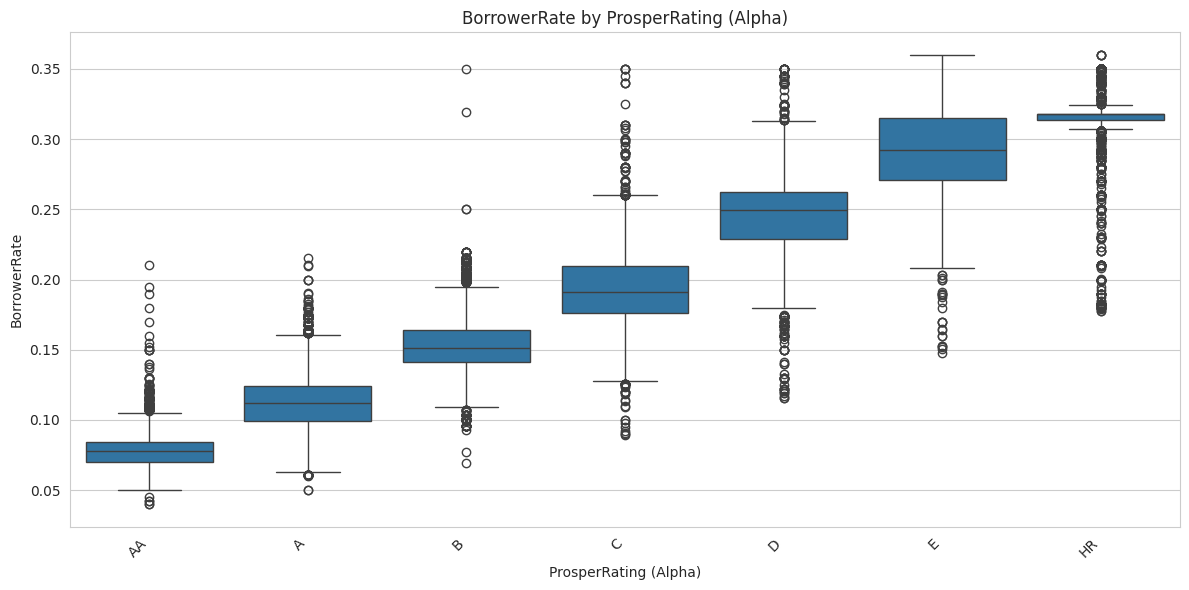

Observations: There is a clear inverse relationship between Prosper rating and interest rate. Higher-rated borrowers (AA, A) are charged significantly lower interest rates compared to lower-rated borrowers (D, E, HR). This confirms that Prosper uses risk-based pricing.

Question: Is there a relationship between loan amount and interest rate?


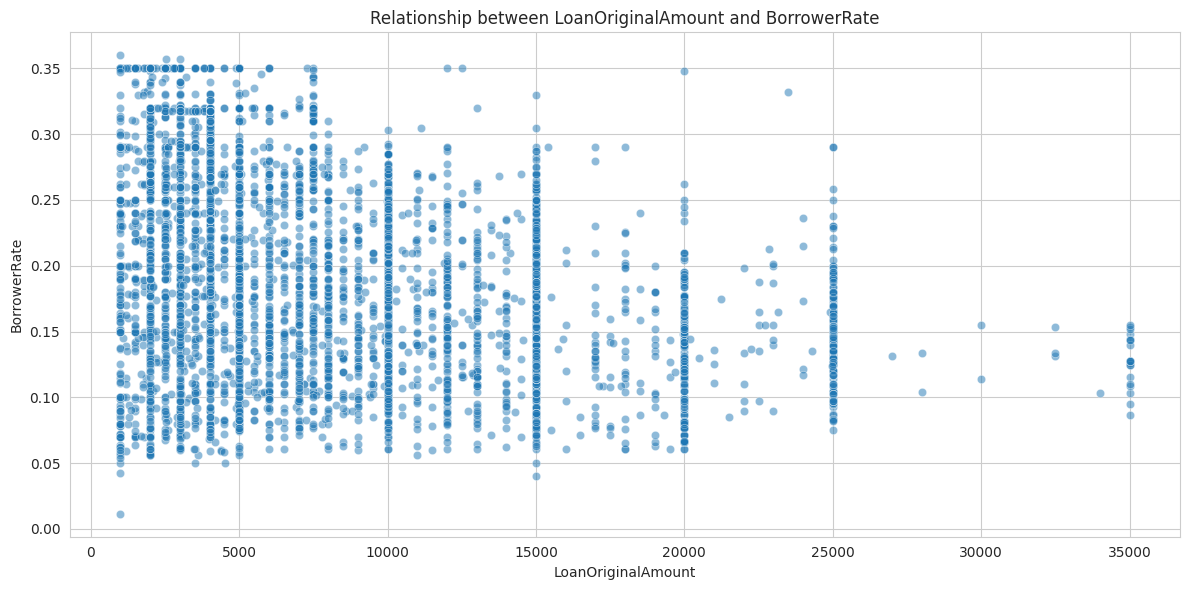

Observations: There is a very poor negative correlation between loan size and interest rate - bigger loans have slightly lower interest rates. The relationship is not very strong, however, because there is quite a lot of variation at each loan size level.

Question: How does loan term affect the interest rate?


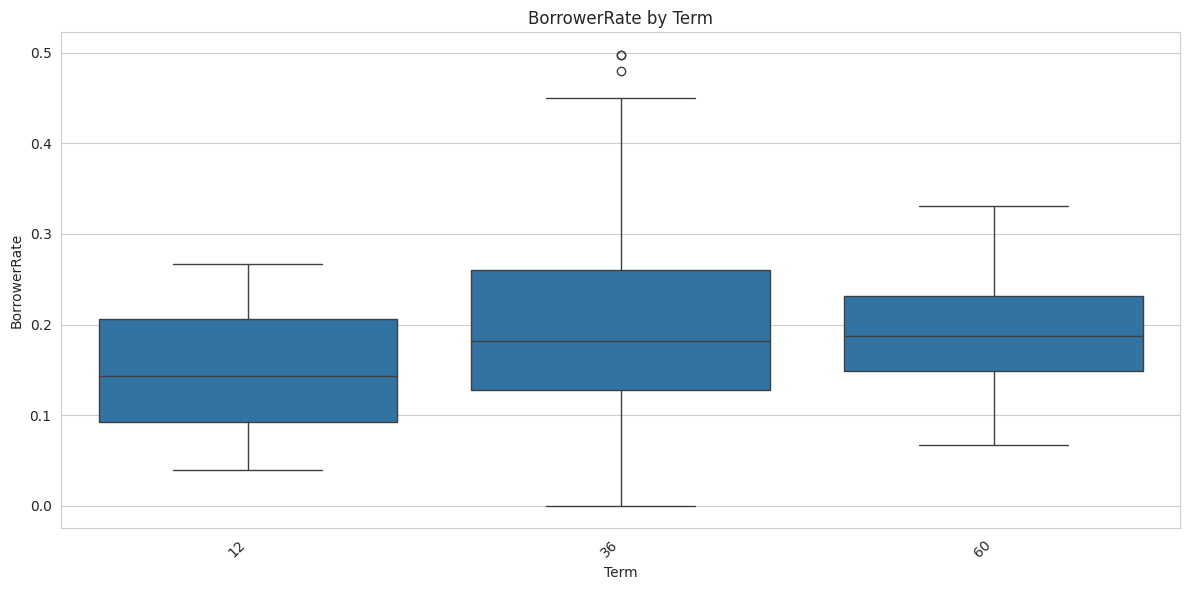

Observations: More long term loans carry higher average interest rates. This is economically rational since more long term loans tend to carry greater risk for lenders.

Question: How does employment status affect interest rates?


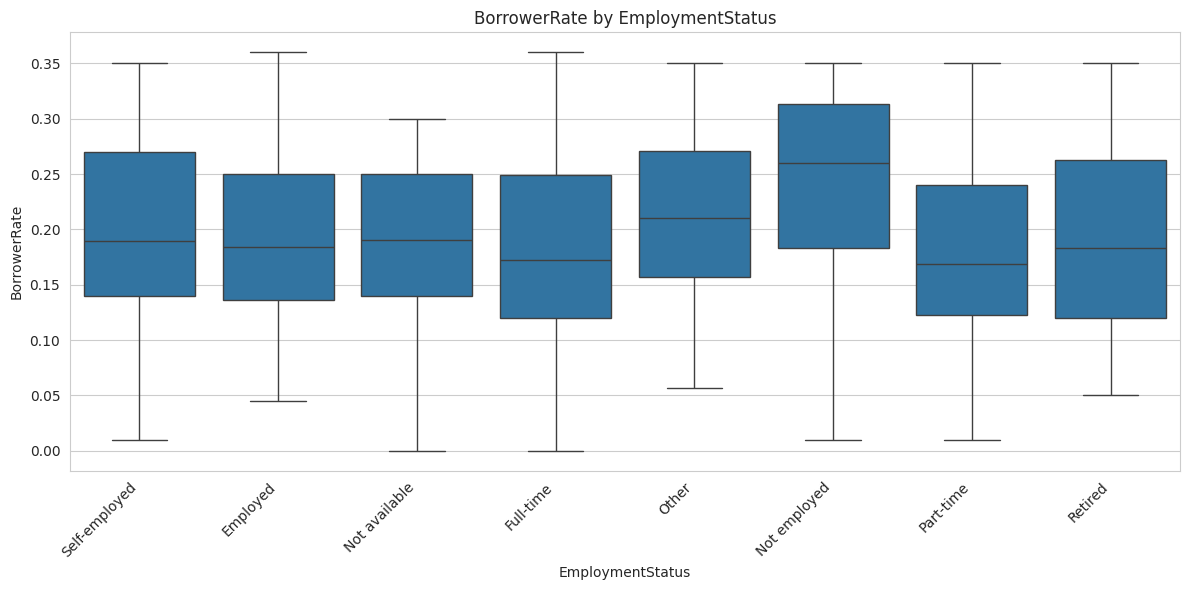

Observations: Working borrowers are given lower interest rates than non-working or part-time workers. This is indicative of the reduced risk that comes with permanent employment.

Question: Is there a relationship between loan status and interest rate?


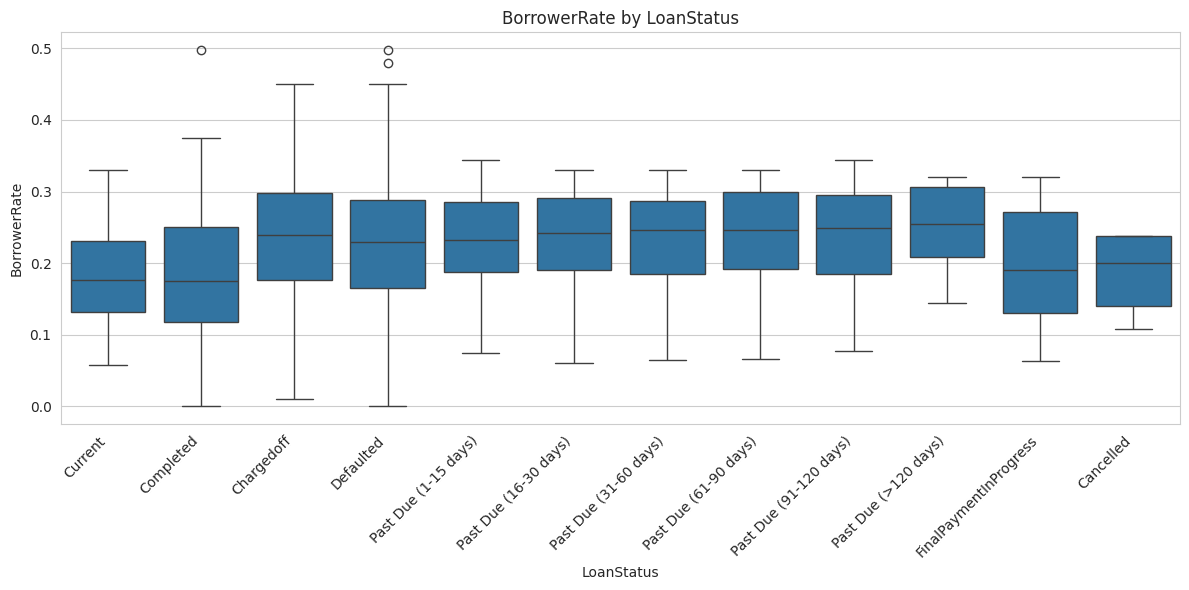

Observations: Completed loans have lower interest rates than defaulted or charged-off loans. This suggests that higher interest loans are more likely to default, or that higher interest loans are harder for borrowers to pay off successfully.
Question: How does Prosper Rating relate to loan outcomes?


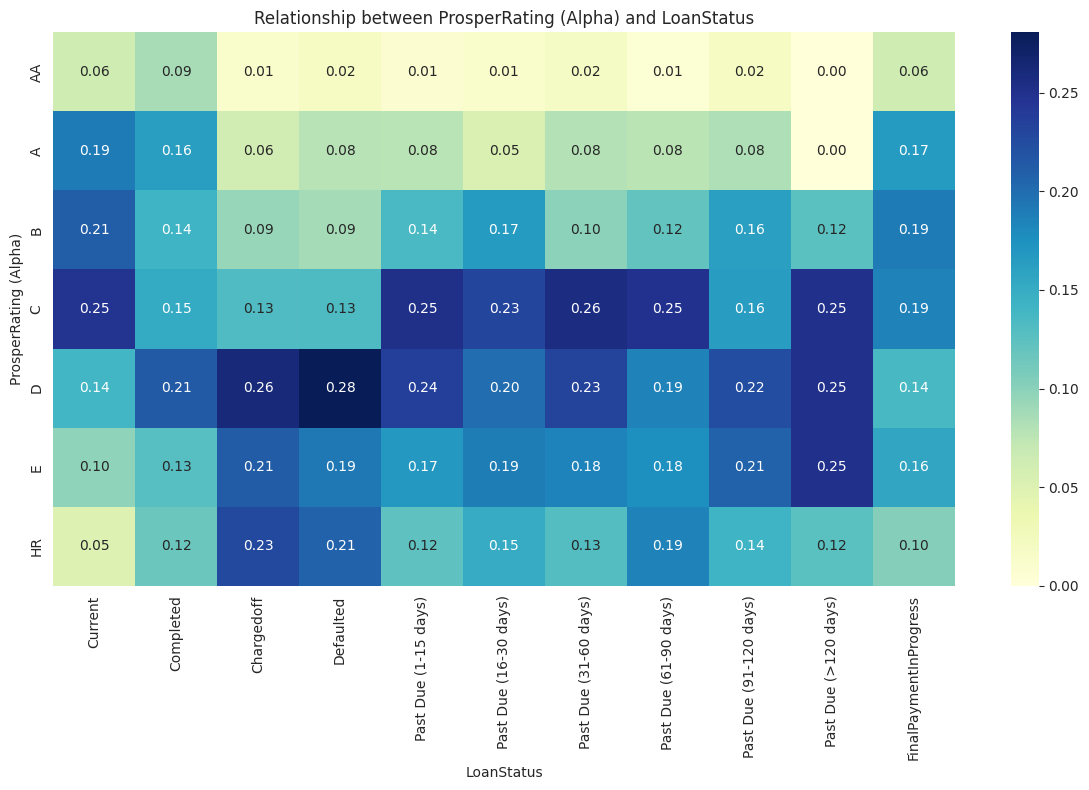

Observations: The heatmap shows that loans with better ratings (AA, A) have higher percentages of 'Completed' or 'Current' status, while loans with worse ratings have higher percentages of 'Defaulted' or 'Charged Off' status. This validates Prosper's rating system as a loan performance predictor.


In [6]:
# 1. Relationship between ProsperRating and BorrowerRate
print("Question: How does the borrower's Prosper rating affect their interest rate?")
plot_categorical_bivariate(df, 'ProsperRating (Alpha)', 'BorrowerRate', order=ProsperRating_order)
print("Observations: There is a clear inverse relationship between Prosper rating and interest rate. Higher-rated borrowers (AA, A) are charged significantly lower interest rates compared to lower-rated borrowers (D, E, HR). This confirms that Prosper uses risk-based pricing.")

# 2. Relationship between LoanOriginalAmount and BorrowerRate
print("\nQuestion: Is there a relationship between loan amount and interest rate?")
plot_numeric_bivariate(df, 'LoanOriginalAmount', 'BorrowerRate', sample=5000)
print("Observations: There is a very poor negative correlation between loan size and interest rate - bigger loans have slightly lower interest rates. The relationship is not very strong, however, because there is quite a lot of variation at each loan size level.")

# 3. Relationship between Term and BorrowerRate
print("\nQuestion: How does loan term affect the interest rate?")
plot_categorical_bivariate(df, 'Term', 'BorrowerRate')
print("Observations: More long term loans carry higher average interest rates. This is economically rational since more long term loans tend to carry greater risk for lenders.")

# 4. Relationship between EmploymentStatus and BorrowerRate
print("\nQuestion: How does employment status affect interest rates?")
plot_categorical_bivariate(df, 'EmploymentStatus', 'BorrowerRate')
print("Observations: Working borrowers are given lower interest rates than non-working or part-time workers. This is indicative of the reduced risk that comes with permanent employment.")

# 5. Relationship between LoanStatus and BorrowerRate using a boxplot
print("\nQuestion: Is there a relationship between loan status and interest rate?")
plot_categorical_bivariate(df, 'LoanStatus', 'BorrowerRate', order=LoanStatus_order)
print("Observations: Completed loans have lower interest rates than defaulted or charged-off loans. This suggests that higher interest loans are more likely to default, or that higher interest loans are harder for borrowers to pay off successfully.")

# 6. Relationship between ProsperRating and LoanStatus using heatmap
print("Question: How does Prosper Rating relate to loan outcomes?")
# For the heatmap between ProsperRating and LoanStatus
key_statuses = [status for status in LoanStatus_order if status in df['LoanStatus'].unique()]
heatmap_data = df[df['LoanStatus'].isin(key_statuses)].dropna(subset=['ProsperRating (Alpha)'])
plot_heatmap(heatmap_data, 'ProsperRating (Alpha)', 'LoanStatus',
             order1=ProsperRating_order, order2=key_statuses)
print("Observations: The heatmap shows that loans with better ratings (AA, A) have higher percentages of 'Completed' or 'Current' status, while loans with worse ratings have higher percentages of 'Defaulted' or 'Charged Off' status. This validates Prosper's rating system as a loan performance predictor.")

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The bivariate exploration revealed several important relationships:
> 1. Prosper Rating and Interest Rate: Prosper rating and interest rate have a strong inverse relationship. Those with AA ratings are offered rates of 5-10%, while people rated as HR (High Risk) can be offered 30% or more. This powerfully demonstrates Prosper's risk-based model of pricing..
> 2. Loan Amount and Interest Rate: The bigger loans will carry slightly lower interest rates on average. This might initially seem paradoxical, but may be a consequence of bigger loans being issued to more creditworthy borrowers.
> 3. Loan Term and Interest Rate: Longer-term loans (60 months) have a higher interest rate on average than shorter-term loans (36 months). This is due to the greater risk involved in longer loan periods.
> 4. Employment Status and Interest Rate: Employed borrowers are offered lower rates compared to unemployed or part-time employed borrowers, as per normal lending conventions for risk-based lending.
> 5. Loan Status and Interest Rate: Charged-off or defaulted loans are those that carried higher interest rates in the first place. This can mean that either riskier borrowers (who pay higher rates) are more likely to default, or that higher interest rates themselves make the loans harder to repay.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In fact, the relationship between Prosper Rating and Loan Status was particularly enlightening:
> Prosper Rating and Loan Status: The heatmap clearly shows that Prosper's rating system is very effective in determining loan success. AA and A-rated loans have much higher rates of successful completions and lower default rates than D, E, and HR-rated loans.

> This verifies Prosper's risk assessment cycle and the rationale behind why they charge higher interest rates to lower-rated borrowers - they're compensating for higher expected default levels.

## Multivariate Exploration

In [7]:
def create_facet_grid(data, x, y, hue, col, col_wrap=3, height=4, aspect=1.5, sample=None):

    # Sample data if specified (useful for large datasets)
    if sample is not None and sample < len(data):
        data_sample = data.sample(sample, random_state=42)
    else:
        data_sample = data

    g = sns.FacetGrid(data_sample, col=col, col_wrap=col_wrap, height=height, aspect=aspect)
    g.map_dataframe(sns.scatterplot, x=x, y=y, hue=hue, alpha=0.6)
    g.add_legend()
    g.fig.suptitle(f'Relationship between {x} and {y}, grouped by {col} and colored by {hue}',
                   fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

def plot_pairplot(data, vars, hue, diag_kind='kde', height=2.5, sample=None):

    # Sample data if specified (useful for large datasets)
    if sample is not None and sample < len(data):
        data_sample = data.sample(sample, random_state=42)
    else:
        data_sample = data

    # Create the pair plot
    sns.pairplot(data_sample, vars=vars, hue=hue, diag_kind=diag_kind, height=height)
    plt.suptitle(f'Pairwise Relationships Colored by {hue}', y=1.02)
    plt.tight_layout()
    plt.show()

Question: How do interest rates vary with loan amount across different Prosper ratings and loan terms?


/tmp/ipykernel_86900/541442032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facet_data['ProsperRating (Alpha)'] = pd.Categorical(facet_data['ProsperRating (Alpha)'],


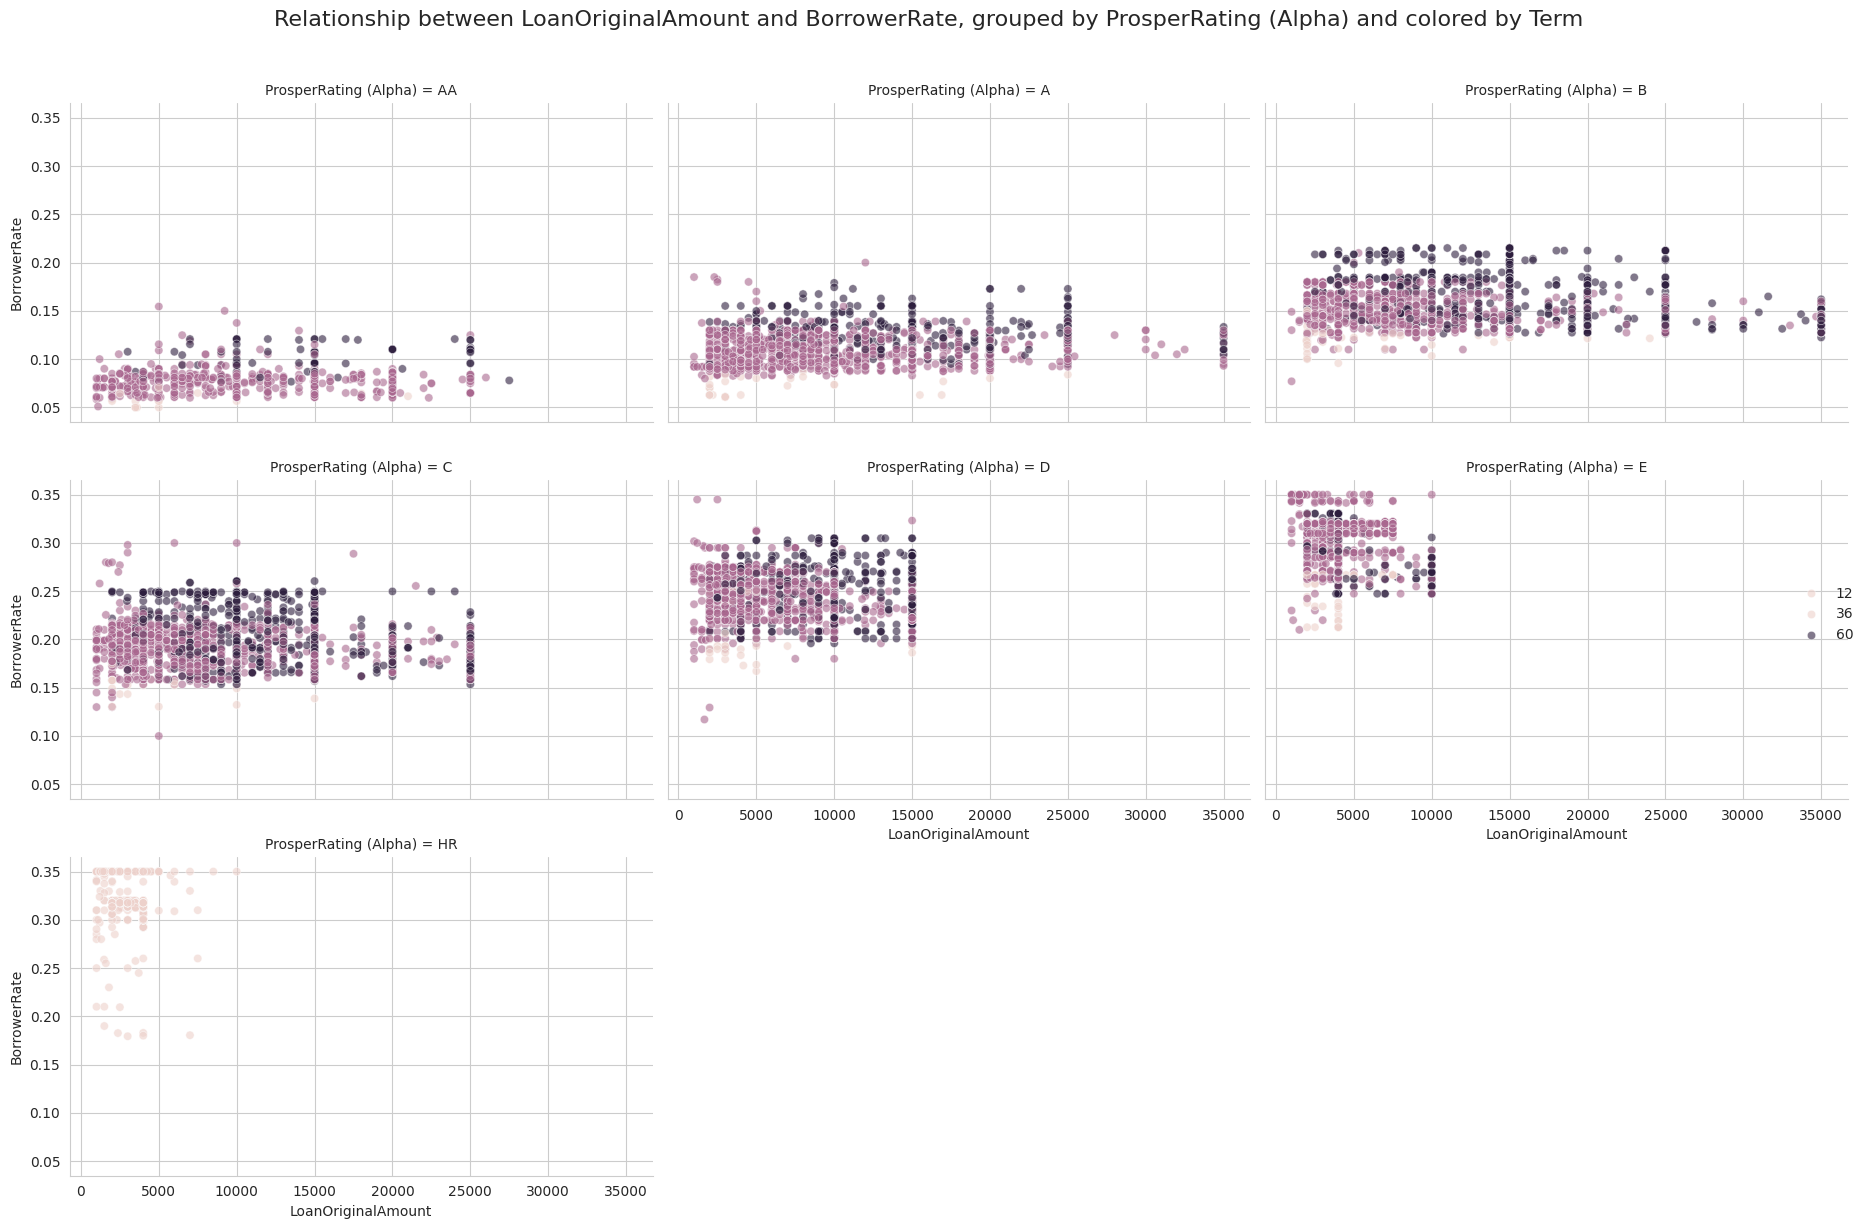

Observations: The facet plot has a few points to consider: 1) For every rating, longer loans (60 months) have higher interest rates than shorter loans (36 months), 2) Negative interest rate and loan amount correlation is more pronounced for good ratings (AA, A), 3) Interest rates are very high for bad ratings (D, E, HR) regardless of loan amount, 4) The interest rate difference decreases as the rating improves, with more consistent pricing for lower-risk borrowers.
Question: How do key numeric loan features interact with each other and relate to loan status?


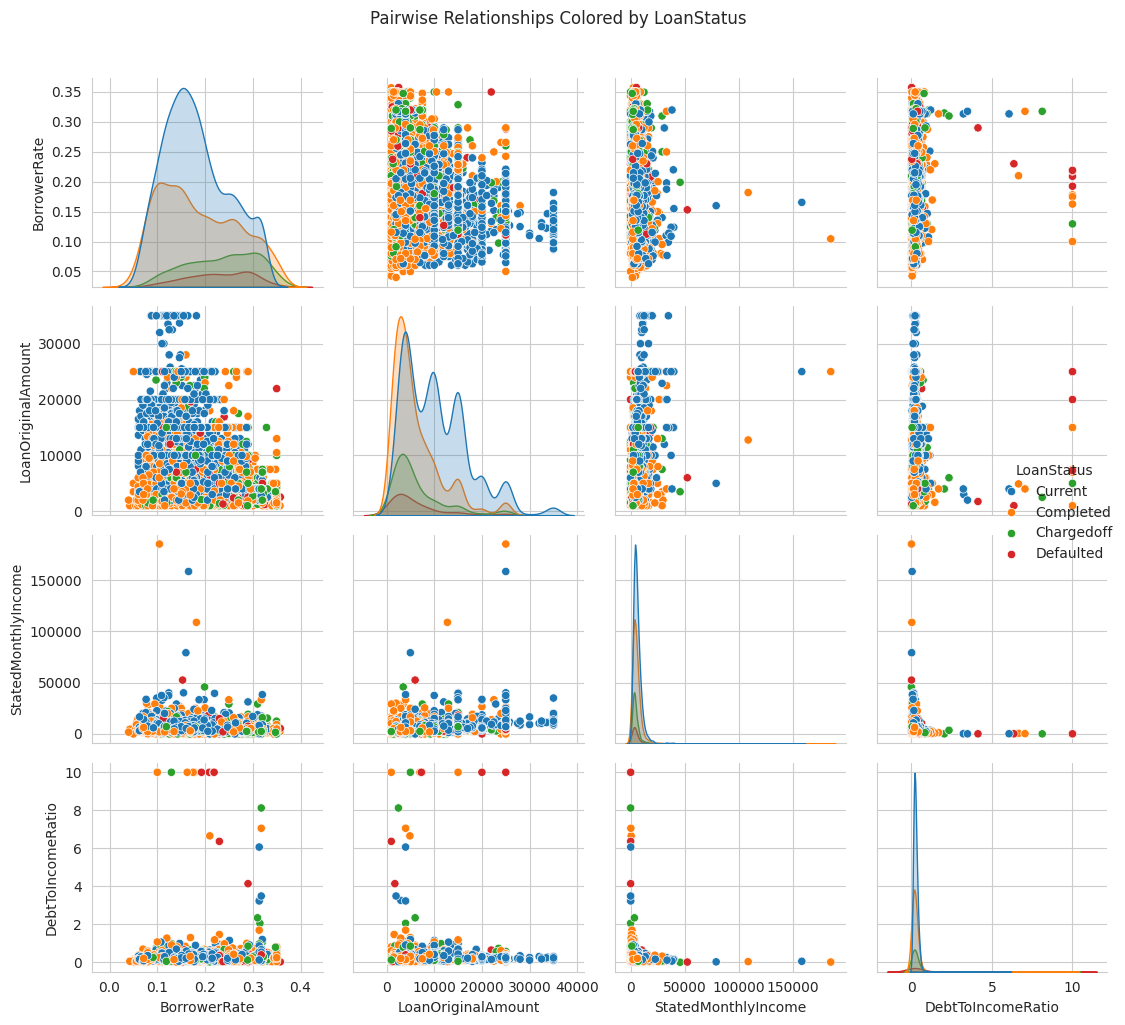

Observations: Several trends are evident from the pairplot: 1) Completed and current loans are lower rate loans compared to defaulted or charged off loans, 2) Larger loans have slightly lower default rates, 3) Income does not strongly discriminate between loan outcomes, although defaulted loans have slightly lower incomes, 4) More defaulted and charged off loans are observed at higher debt-to-income ratios, 5) There is a positive correlation between debt-to-income ratio and borrower rate, which means Prosper charges higher rates for more indebted borrowers.


In [8]:
# 1. Facet grid: BorrowerRate vs. LoanOriginalAmount colored by Term, faceted by ProsperRating
print("Question: How do interest rates vary with loan amount across different Prosper ratings and loan terms?")
# Filter to remove missing values and sample for better visualization
facet_data = df.dropna(subset=['ProsperRating (Alpha)', 'Term', 'BorrowerRate', 'LoanOriginalAmount'])
facet_data['ProsperRating (Alpha)'] = pd.Categorical(facet_data['ProsperRating (Alpha)'],
                                                     categories=ProsperRating_order,
                                                     ordered=True)
create_facet_grid(facet_data, 'LoanOriginalAmount', 'BorrowerRate', 'Term', 'ProsperRating (Alpha)',
                  sample=10000)
print("Observations: The facet plot has a few points to consider: 1) For every rating, longer loans (60 months) have higher interest rates than shorter loans (36 months), 2) Negative interest rate and loan amount correlation is more pronounced for good ratings (AA, A), 3) Interest rates are very high for bad ratings (D, E, HR) regardless of loan amount, 4) The interest rate difference decreases as the rating improves, with more consistent pricing for lower-risk borrowers.")
# 2. Pairplot of key numeric variables colored by LoanStatus
print("Question: How do key numeric loan features interact with each other and relate to loan status?")
# Filter loan status to major categories and sample for visualization
loan_status_subset = ['Completed', 'Current', 'Defaulted', 'Chargedoff']
pairplot_data = df[df['LoanStatus'].isin(loan_status_subset)].copy()
# Convert LoanStatus to categorical with proper order
valid_order = [status for status in LoanStatus_order if status in loan_status_subset]
pairplot_data['LoanStatus'] = pd.Categorical(pairplot_data['LoanStatus'],
                                             categories=valid_order,
                                             ordered=True)
plot_pairplot(pairplot_data,
              ['BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio'],
              'LoanStatus', sample=5000)
print("Observations: Several trends are evident from the pairplot: 1) Completed and current loans are lower rate loans compared to defaulted or charged off loans, 2) Larger loans have slightly lower default rates, 3) Income does not strongly discriminate between loan outcomes, although defaulted loans have slightly lower incomes, 4) More defaulted and charged off loans are observed at higher debt-to-income ratios, 5) There is a positive correlation between debt-to-income ratio and borrower rate, which means Prosper charges higher rates for more indebted borrowers.")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration revealed complex interactions between variables that weren't apparent in the bivariate analysis:
> 1. Loan Amount, Interest Rate, Term, and Prosper Rating: The facet plot also showed that the relation between loan amount and interest rate is very different for various Prosper ratings. While there is a clearer negative relation between interest rate and loan amount for good borrowers (AA, A), for poor borrowers interest rates are high regardless of loan amount. This means that credit quality (as reflected in Prosper Rating) exerts a larger effect on interest rates than loan amount.
> 2. Relationship Between Multiple Numeric Variables and Loan Status: The pairplot revealed that successful loans have smaller interest rates, bigger loan amounts, and smaller debt-to-income ratios compared to defaulted loans. It is these factors combined that confirm our image of what makes a successful loan. It's not just interest rates - it's the entire financial profile of the borrower.

### Were there any interesting or surprising interactions between features?

> Yes, several surprising interactions emerged:
> 1. Term Length Effect Across Ratings: The effect of term on interest rate was consistent across the full range of Prosper ratings. Even borrowers with AA ratings are required to pay significantly more for 60-month loans compared to 36-month loans, showing that loan term is a fundamental risk driver regardless of credit quality.
> 2. Debt-to-Income Ratio Impact: The pairplot revealed that debt-to-income ratio strongly correlates with interest rate and loan outcome. The greater the debt-to-income ratio, the greater the interest rate and the greater the chance of default, which means this is a key metric in Prosper's risk model.
> 3. Income's Limited Impact: Somewhat counterintuitively, monthly income did not strongly differentiate between loan success and failure in multivariate analysis. This suggests that the absolute income level might be less important than relative measures like debt-to-income ratio in predicting loan success.

## Conclusions
> This exploration of the Prosper Loan dataset has revealed several key insights about peer-to-peer lending through Prosper's platform:
> Key Findings:
> 1. Risk-Based Pricing Model: Prosper employs a sophisticated risk-based pricing model where interest rates strongly correlate with the borrower's Prosper Rating. This rating effectively predicts loan outcomes, with higher-rated loans showing significantly lower default rates.
> 2. Loan Term Impact: Longer-term loans (60 months) consistently have higher interest rates than shorter-term loans (36 months), regardless of borrower creditworthiness. This reflects the increased time risk associated with longer loan periods.
> 3. Interest Rates and Loan Amount: Larger loans have somewhat lower interest rates, particularly for more highly rated borrowers. This would mean that larger loans may be approved largely for financially healthier borrowers.
> 4. Debt-to-Income Relationship: This rises with higher debt-to-income ratios, and so does the default probability and interest rates, showing this to be a significant risk metric for Prosper's model to employ.
> 5. Importance of Employment Status: Working borrowers are provided with more favorable interest rates than unemployed or part-time borrowers based on the risk assessment involved in regular income.
> 6. Successful Loan Profile: Successful loans are characterized by lower interest rates, proper loan levels compared to income, and lower debt-to-income ratios than defaulted loans.

> These findings are enlightening to both potential investors and borrowers on the Prosper platform. Borrowers can see how the variables that most influence their loan terms, while investors can more effectively assess the risk-return profile of different classes of loans.

In [9]:
 # Export to HTML
!jupyter nbconvert --to HTML Part_I_exploration_template.ipynb

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to HTML
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 2306658 bytes to Part_I_exploration_template.html
